# Ford GoBike System Data
## by Sertaç Özker

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 2019 data from January to October is available. This data is downloaded from https://s3.amazonaws.com/baywheels-data/index.html as seperate months and other dates are available. All the files will be combined in dataframes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> I start loading all month data one by one and then combine them all.

In [2]:
# different months are loaded as different dataframes

df_01 = pd.read_csv('data/201901-fordgobike-tripdata.csv', sep=';')
print('df_01 loaded with '+str(len(df_01.index))+' rows')

df_02 = pd.read_csv('data/201902-fordgobike-tripdata.csv', sep=';')
print('df_02 loaded with '+str(len(df_02.index))+' rows')

df_03 = pd.read_csv('data/201903-fordgobike-tripdata.csv', sep=';')
print('df_03 loaded with '+str(len(df_03.index))+' rows')

df_04 = pd.read_csv('data/201904-fordgobike-tripdata.csv', sep=';')
print('df_04 loaded with '+str(len(df_04.index))+' rows')

df_05 = pd.read_csv('data/201905-baywheels-tripdata.csv', sep=';')
print('df_05 loaded with '+str(len(df_05.index))+' rows')

df_06 = pd.read_csv('data/201906-baywheels-tripdata.csv', sep=';')
print('df_06 loaded with '+str(len(df_06.index))+' rows')
df_06.drop('rental_access_method', axis=1, inplace=True)

df_07 = pd.read_csv('data/201907-baywheels-tripdata.csv', sep=';')
print('df_07 loaded with '+str(len(df_07.index))+' rows')
df_07.drop('rental_access_method', axis=1, inplace=True)

df_08 = pd.read_csv('data/201908-baywheels-tripdata.csv', sep=';')
print('df_08 loaded with '+str(len(df_08.index))+' rows')

df_09 = pd.read_csv('data/201909-baywheels-tripdata.csv', sep=';')
print('df_09 loaded with '+str(len(df_09.index))+' rows')

df_10 = pd.read_csv('data/201910-baywheels-tripdata.csv', sep=';')
print('df_10 loaded with '+str(len(df_10.index))+' rows')


# all the months are loaded into single dataframe

df = pd.concat([df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10])
print('all dataframes concatenated with  '+str(len(df.index))+' rows')

df_01 loaded with 192082 rows
df_02 loaded with 183412 rows
df_03 loaded with 256299 rows
df_04 loaded with 239111 rows
df_05 loaded with 182163 rows


C:\Users\sozke\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


df_06 loaded with 191772 rows


C:\Users\sozke\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


df_07 loaded with 258102 rows
df_08 loaded with 210563 rows
df_09 loaded with 217986 rows
df_10 loaded with 239895 rows
all dataframes concatenated with  2171385 rows


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171385 entries, 0 to 239894
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 248.5+ MB


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.171385e+06,2.112593e+06,2.171385e+06,2.171385e+06,2.110802e+06,2.171385e+06,2.171385e+06,2.171385e+06
mean,8.092649e+02,1.438054e+02,3.776753e+01,-1.223521e+02,1.406781e+02,3.776722e+01,-1.223500e+02,2.434628e+04
std,1.899098e+03,1.195369e+02,1.077320e-01,1.613536e-01,1.188511e+02,1.731443e-01,4.679006e-01,1.063788e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,1.100000e+01
25%,3.580000e+02,4.700000e+01,3.777003e+01,-1.224130e+02,4.300000e+01,3.777041e+01,-1.224117e+02,1.830000e+03
50%,5.700000e+02,1.040000e+02,3.778053e+01,-1.223983e+02,1.000000e+02,3.778079e+01,-1.223974e+02,3.635000e+03
75%,8.870000e+02,2.400000e+02,3.779625e+01,-1.222914e+02,2.380000e+02,3.779728e+01,-1.222934e+02,6.383000e+03
max,8.621700e+04,4.820000e+02,4.551000e+01,0.000000e+00,4.820000e+02,4.551000e+01,0.000000e+00,9.994220e+05


In [7]:
# I'm deleting the other dataframes in order release some memory
df_01 = 0
df_02 = 0
df_03 = 0
df_04 = 0
df_05 = 0
df_06 = 0
df_07 = 0
df_08 = 0
df_09 = 0
df_10 = 0

### Data Assesment, Cleaning and Wrangling

> All columns will be assesed at this part and check for null or inappropriate values.

* Converting start_time and end_time to datetime
* Converting start_station_id, end_station_id, bike_id to string

In [8]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

Creating a new column for duration_hour and duration_min

In [53]:
df['duration_min'] = df['duration_sec'] / 60 
df['duration_hour'] = df['duration_sec'] / 3600

Checking bike_share_for_all_trip column ==> looks fine

In [10]:
df.bike_share_for_all_trip.value_counts()

No     1915865
Yes     163773
Name: bike_share_for_all_trip, dtype: int64

Checking user_type column ==> looks fine

In [11]:
df.user_type.value_counts()

Subscriber    1799268
Customer       372117
Name: user_type, dtype: int64

Checking start_station_id for null values.

In [12]:
x = pd.DataFrame(df[df['start_station_id']=='nan'].groupby('start_station_name')['duration_sec'].count())
x = x.reset_index()
x

,start_station_name,duration_sec
0,1st St at San Carlos Ave,72
1,2nd St at Folsom St,161
2,5th St at Folsom,154
3,5th St at Taylor St,7
4,Empire St at 7th St,30
5,Farnam St at Fruitvale Ave,4
6,George St at 1st St,46
7,Morrison Ave at Julian St,122


I've checked if the same start_station_name has start_station_id's in other rows. It seems that for example "1st St at San Carlos Ave" is not null in all rows. So I will replace these start_station_id's accordingly.

In [13]:
y = pd.merge(df, x, on=['start_station_name'])
y.groupby('start_station_name')['start_station_id'].min()

start_station_name
1st St at San Carlos Ave      316.0
2nd St at Folsom St            37.0
5th St at Folsom              321.0
5th St at Taylor St           289.0
Empire St at 7th St           378.0
Farnam St at Fruitvale Ave    234.0
George St at 1st St           290.0
Morrison Ave at Julian St     277.0
Name: start_station_id, dtype: object

I've replaced the start_station_id's according to the other rows.

In [14]:
df.loc[df.start_station_name == '1st St at San Carlos Ave', 'start_station_id'] = '316.0' 
df.loc[df.start_station_name == '2nd St at Folsom St', 'start_station_id'] = '37.0'
df.loc[df.start_station_name == '5th St at Folsom', 'start_station_id'] = '321.0' 
df.loc[df.start_station_name == '5th St at Taylor St', 'start_station_id'] = '289.0' 
df.loc[df.start_station_name == 'Empire St at 7th St', 'start_station_id'] = '378.0' 
df.loc[df.start_station_name == 'Farnam St at Fruitvale Ave', 'start_station_id'] = '234.0' 
df.loc[df.start_station_name == 'George St at 1st St', 'start_station_id'] = '290.0' 
df.loc[df.start_station_name == 'Morrison Ave at Julian St', 'start_station_id'] = '277.0' 

No null value left for start_station_id

In [15]:
a = pd.DataFrame(df[df['start_station_id']=='nan'].groupby('start_station_name')['duration_sec'].count())
a

,duration_sec
start_station_name,


I will do the same process for end_station_id

In [16]:
x = pd.DataFrame(df[df['end_station_id']=='nan'].groupby('end_station_name')['duration_sec'].count())
x = x.reset_index()

y = pd.merge(df, x, on=['end_station_name'])
y.groupby('end_station_name')['end_station_id'].min()

end_station_name
1st St at San Carlos Ave      316.0
2nd St at Folsom St            37.0
5th St at Folsom              321.0
5th St at Taylor St           289.0
Empire St at 7th St           378.0
Farnam St at Fruitvale Ave    234.0
George St at 1st St           290.0
Morrison Ave at Julian St     277.0
Name: end_station_id, dtype: object

In [17]:
df.loc[df.end_station_name == '1st St at San Carlos Ave', 'end_station_id'] = '316.0' 
df.loc[df.end_station_name == '2nd St at Folsom St', 'end_station_id'] = '37.0'
df.loc[df.end_station_name == '5th St at Folsom', 'end_station_id'] = '321.0' 
df.loc[df.end_station_name == '5th St at Taylor St', 'end_station_id'] = '289.0' 
df.loc[df.end_station_name == 'Empire St at 7th St', 'end_station_id'] = '378.0' 
df.loc[df.end_station_name == 'Farnam St at Fruitvale Ave', 'end_station_id'] = '234.0' 
df.loc[df.end_station_name == 'George St at 1st St', 'end_station_id'] = '290.0' 
df.loc[df.end_station_name == 'Morrison Ave at Julian St', 'end_station_id'] = '277.0' 

Creating additional columns regarding the date and time of the renting.

In [18]:
df['start_time_month'] = df['start_time'].dt.month.astype(int)
df['start_time_hour'] = df['start_time'].dt.hour.astype(int)
df['end_time_hour'] = df['end_time'].dt.hour.astype(int)

df['start_time_day'] = df['start_time'].dt.strftime('%a')

In [19]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,duration_hour,start_time_month,start_time_hour,end_time_hour,start_time_day
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,1347.083333,22.451389,1,17,16,Thu
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,1098.333333,18.305556,1,20,15,Thu
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,1043.883333,17.398056,1,18,11,Thu
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,744.666667,12.411111,1,19,8,Thu
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,1011.816667,16.863611,1,14,7,Thu


I've created a column to check if the bike is left on the same station where it was taken.

In [20]:
df['Left_in_same_station'] = 'No'
df.loc[df.start_station_name == df.end_station_name, 'Left_in_same_station'] = 'Yes' 
df.Left_in_same_station.value_counts()

No     2119319
Yes      52066
Name: Left_in_same_station, dtype: int64

### What is the structure of your dataset?

> The dataframe consisted of 14 columns with 2.171.385 rows for 10 months in 2019. I've created 6 more columns for my analytical purposes (rent duration in hours and if the bike was returned to the same station and other columns related to the date and time).

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in the stations, time and duration of rents.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The number of rents, duration of rents and more used stations can be a point of interest.

## Univariate Exploration


#### Observation 1:
> There are trips up to 1400 minutes. However I saw that most of the trips are shorter than 60 minutes. We saw above that average trip duration was 809 seconds (13.5 minutes). The graph below shows that most of the trips are less than 20 minutes.

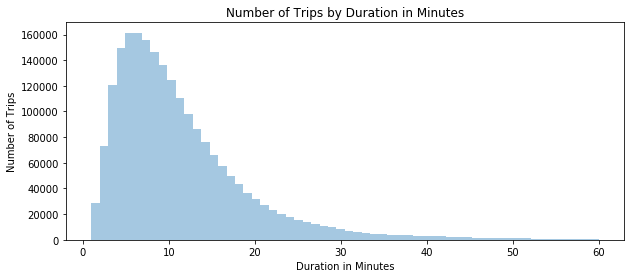

In [20]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.distplot(df[df['duration_min']<60]['duration_min'], kde=False, bins=60)
plt.title("Number of Trips by Duration in Minutes")
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Trips');
plt.show()

#### Observation 2:
> The graph below shows that big percent of the trips are done by the subscribers.

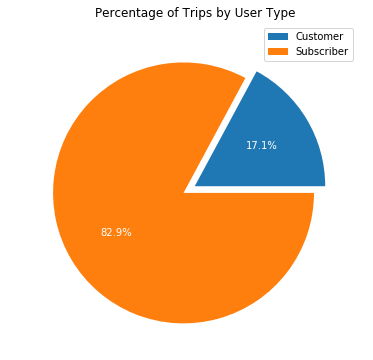

In [21]:
total_trips = df['duration_sec'].count()
customer_trips = df[df['user_type']=='Customer']['duration_sec'].count() / total_trips
subscriber_trips = df[df['user_type']=='Subscriber']['duration_sec'].count() / total_trips

plt.figure(figsize=(6,6))
plt.pie([customer_trips,subscriber_trips], explode=(0, 0.1), labels=['Customer', 'Subscriber'], 
        autopct='%1.1f%%', startangle=0, textprops={'color':'white'})
plt.title("Percentage of Trips by User Type")
plt.legend()
plt.show()

#### Observation 3:
> The graph below shows that most trips are done during weekdays which suggests that bike are mostly used for commuting from home to work or vice versa. To make sure this is correct, we need to check the trips by hours as well.

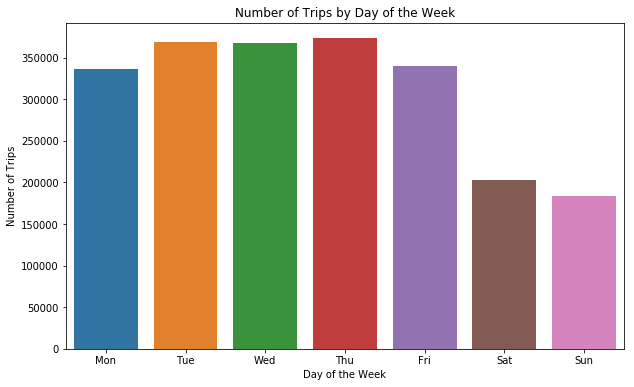

In [22]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
sns.countplot(x='start_time_day',data=df, order = day_order)
plt.title("Number of Trips by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips');
plt.show()

#### Observation 4:
> The visualisation below proves that our trips are done mostly during rush hours. Most trips are done before and after working hours. During the day, there is also a high number of trips done. It's getting less after midnight.

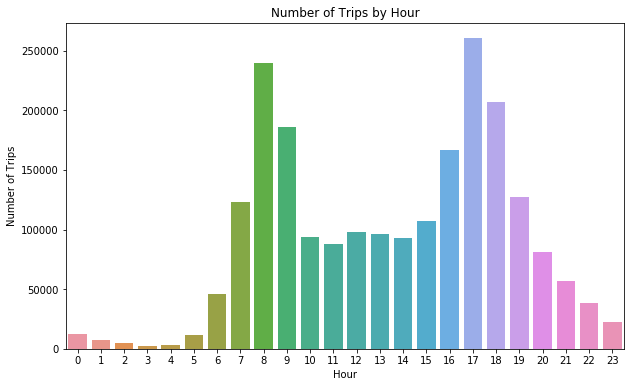

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='start_time_hour',data=df)
plt.title("Number of Trips by Hour")
plt.xlabel('Hour')
plt.ylabel('Number of Trips');
plt.show()

#### Observation 5:
> I was wondering if number of trips are increasing over time. This would show that the business was doing well. However, I was also expecting to see some form of seasonality with more trips being done during spring and summer. Unfortunately, my graph doesn't show any such possibility. There is a trend of more trips being done over time but there are strange jumps for March, April and July. I cannot find any possible reason for this by using one column.

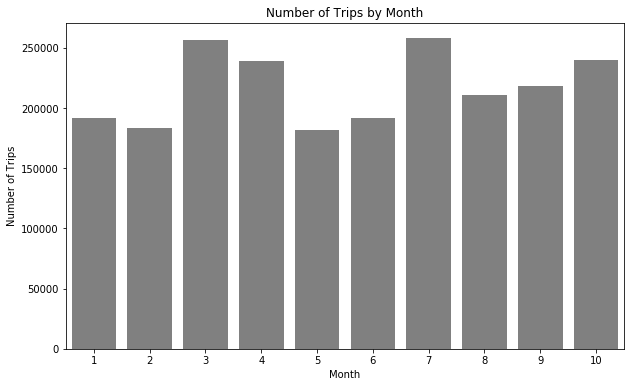

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='start_time_month',data=df, color='Grey')
plt.title("Number of Trips by Month")
plt.xlabel('Month')
plt.ylabel('Number of Trips');
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the points I've checked, I didn't see any unusual points. I generally checked the time and duration of the trips which shows that users are mostly using the bikes for commuting from/to home and work.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was only for the duration of the trips as there were some very long rents. In order to not show them in my graph, I just visualized the trips less than 1 hour. 

## Bivariate Exploration

> I've checked for the pairplot of the fields that I find relevant. However, this pairplot didn't give me anything meaningful.

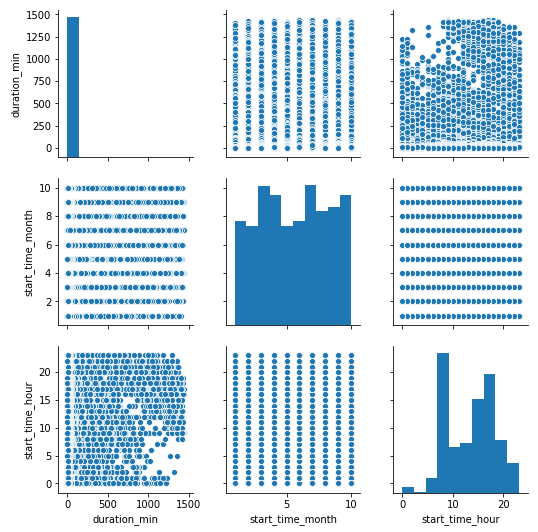

In [25]:
data = df[['user_type','bike_share_for_all_trip','duration_min','start_time_month','start_time_hour','start_time_day']]

sns.pairplot(data)

#### Observation 1:
> The graph below shows that if we check the trips less than 1 hour, during weekdays the trips are mostly less than 10 minutes. However, people do longer trips during weekends.

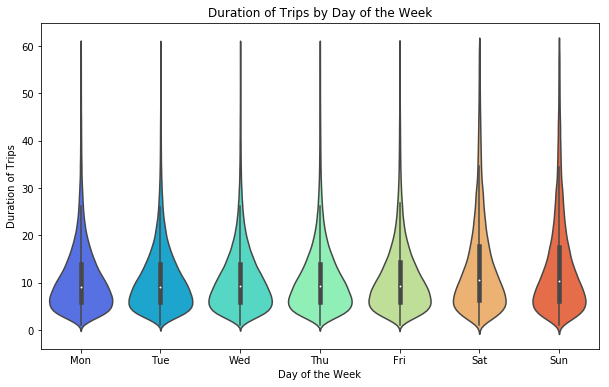

In [26]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
sns.violinplot(x='start_time_day', y='duration_min', data=df[df['duration_min']<60], palette='rainbow', order = day_order)
plt.title("Duration of Trips by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Trips');
plt.show()

#### Observation 2:
> In the following two graphs, I wanted to check if the duration of the trips change between hours and weekdays-weekends. 

> The 1st graph shows that during weekdays longest trips are done after midnight. Rush hour trips are many but they are very short.

> On the contrary, during weekends people do longer trips at around 14:00 - 15:00.

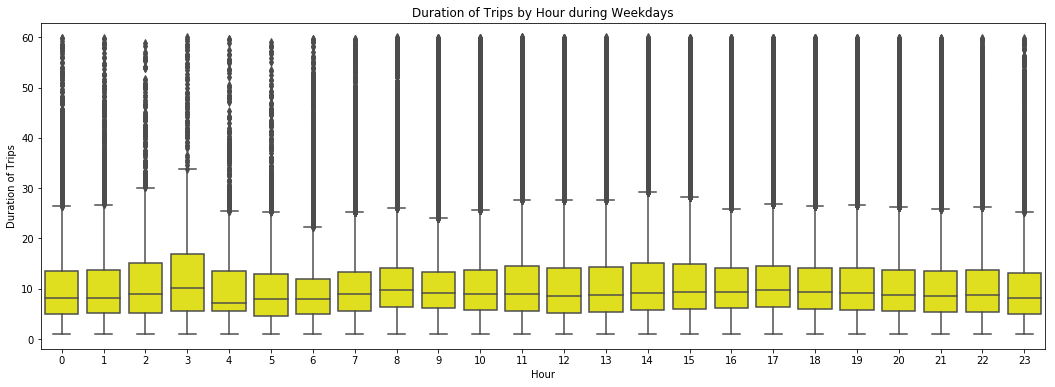

In [27]:
data = df[(df['duration_min']<60) & (df['start_time_day']!='Sat') & (df['start_time_day']!='Sun')]

plt.figure(figsize=(18,6))
sns.boxplot(x='start_time_hour', y='duration_min', data=data, color='yellow')
plt.title("Duration of Trips by Hour during Weekdays")
plt.xlabel('Hour')
plt.ylabel('Duration of Trips');
plt.show()

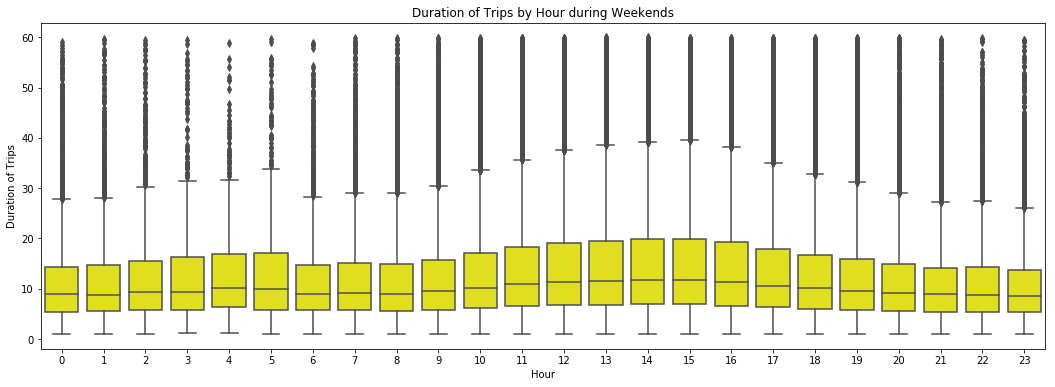

In [28]:
data = df[(df['duration_min']<60) & ((df['start_time_day']=='Sat') | (df['start_time_day']=='Sun'))]

plt.figure(figsize=(18,6))
sns.boxplot(x='start_time_hour', y='duration_min', data=data, color='yellow')
plt.title("Duration of Trips by Hour during Weekends")
plt.xlabel('Hour')
plt.ylabel('Duration of Trips');
plt.show()

At this point, I have realized that I will use this weekday / weekend distinction more so I decided to create a new column for this.

In [21]:
df['week_period'] = df['start_time_day']

df.week_period = df.week_period.replace("Mon", "Weekday")
df.week_period = df.week_period.replace("Tue", "Weekday")
df.week_period = df.week_period.replace("Wed", "Weekday")
df.week_period = df.week_period.replace("Thu", "Weekday")
df.week_period = df.week_period.replace("Fri", "Weekday")

df.week_period = df.week_period.replace("Sat", "Weekend")
df.week_period = df.week_period.replace("Sun", "Weekend")

df.week_period.value_counts()

Weekday    1784874
Weekend     386511
Name: week_period, dtype: int64

#### Observation 3:
> If we check the number of trips seperated by Weekdays and Weekends, we can, once again, clearly see that bike sharing program is used for commuting purposes mostly.

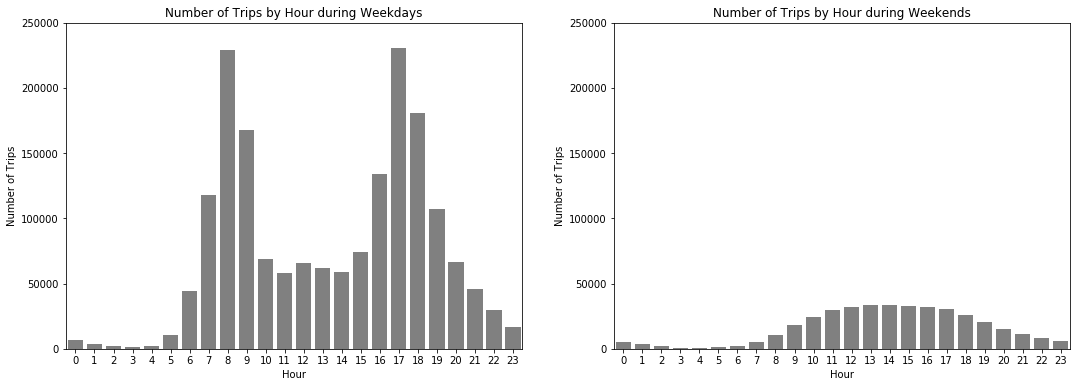

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
fig1 = sns.countplot(x='start_time_hour',data=df[df['week_period']=='Weekday'], color='Grey')
plt.title("Number of Trips by Hour during Weekdays")
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.ylim([0,250000])


plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
fig1 = sns.countplot(x='start_time_hour',data=df[df['week_period']=='Weekend'], color='Grey')
plt.title("Number of Trips by Hour during Weekends")
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.ylim([0,250000])
plt.show()

#### Observation 4:
> If you remember, there was a sharp increase in the number of trips done in July. It was falling back in August. I wondered if this difference was happening because of the trips done in weekdays or weekends. It appears that weekend trips are very low in each month, compared to weekday trips.

> I will check for more details in Multivariate Exploration section.

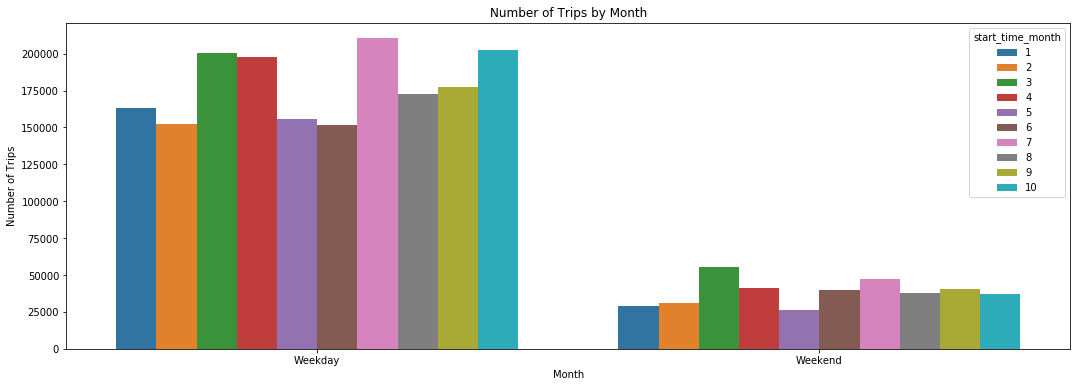

In [31]:
plt.figure(figsize=(18,6))
sns.countplot(x='week_period',data=df, hue='start_time_month')
plt.title("Number of Trips by Month")
plt.xlabel('Month')
plt.ylabel('Number of Trips');
plt.show()

At this point I've realized that I can also calculate the difference between the start and end stations. This can be a valueable information.

In [22]:
# this function is to calculate the distance based on the latitude/longitude

# the code was copied form:
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

from math import sin, cos, sqrt, atan2, radians

def distance (lat1,lon1,lat2,lon2):
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance)) # return distance in meters

# generating distance column using the defined function
df['distance'] = df.apply(lambda row: distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,duration_hour,start_time_month,start_time_hour,end_time_hour,start_time_day,Left_in_same_station,week_period,distance
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,No,1347.083333,22.451389,1,17,16,Thu,No,Weekday,5307.0
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,No,1098.333333,18.305556,1,20,15,Thu,No,Weekday,3861.0
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,No,1043.883333,17.398056,1,18,11,Thu,No,Weekday,3288.0
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,No,744.666667,12.411111,1,19,8,Thu,No,Weekday,1000.0
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,No,1011.816667,16.863611,1,14,7,Thu,No,Weekday,954.0


In [23]:
df['distance'].describe()

count    2.171385e+06
mean     1.878527e+03
std      4.757588e+04
min      0.000000e+00
25%      9.290000e+02
50%      1.457000e+03
75%      2.241000e+03
max      1.280236e+07
Name: distance, dtype: float64

#### Observation 5:
> I wondered if the driving distance differs between weekdays and weekends as the reason of the trips changes. However the graph below shows that the trip distance is similar.

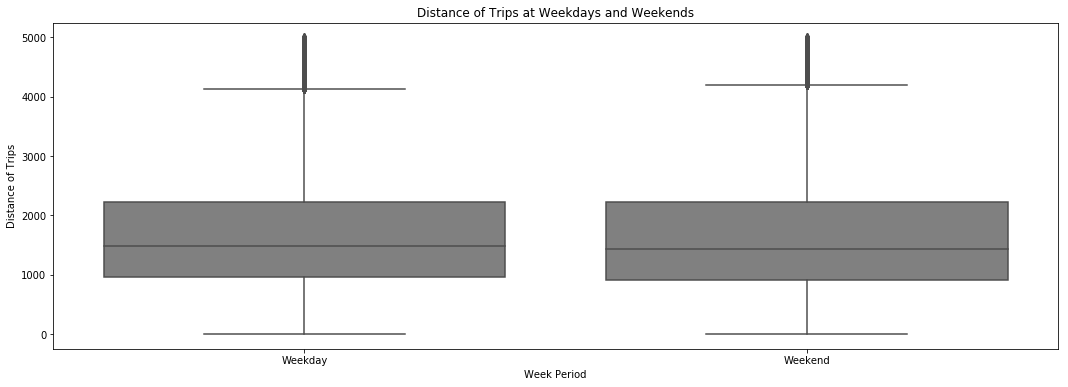

In [42]:
data = df[(df['Left_in_same_station']=='No') & (df['distance']<5000)]

plt.figure(figsize=(18,6))
sns.boxplot(x="week_period", y="distance",data=data, color="grey")
plt.title("Distance of Trips at Weekdays and Weekends")
plt.xlabel('Week Period')
plt.ylabel('Distance of Trips');
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw that rush hour trips are very short during weekdays. People might be using it until the main public transport. On the contrary trips are longer during weekends as people roam more freely.

> Distance covered does not change a lot between weekdays and weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The number of trips during weekends are significantly low.

## Multivariate Exploration

#### Observation 1:
> To look at the difference between the number of trips done in July and August, I decided to look at them day by day. In order to make it more visible, I seperated the weekday and weekend graphs as it could lead to some confusion.
> So the graph below shows that number of trips were similar at the beginning of the both months. But, later something happened and the number of trips done in July nearly doubled (between 20th and 31st of July). We don't know the exact reason for this. There might have been a campaign or marketing success. Our current data does not give enough information to dig more of this.

C:\Users\sozke\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


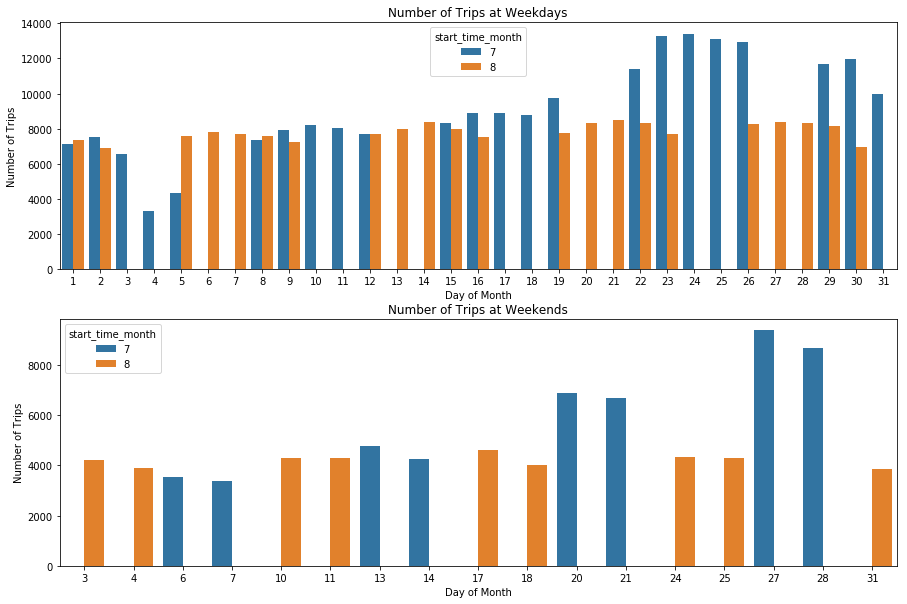

In [35]:
data = df[((df['start_time_month'] == 7) | (df['start_time_month'] == 8))] #copying July and August data to a seperate dataframe

data['start_time_num_day'] = data['start_time'].dt.day.astype(int) #creating a day column


plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
sns.countplot(x='start_time_num_day',data=data[data['week_period']=='Weekday'], hue='start_time_month')
plt.title("Number of Trips at Weekdays")
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')

plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 1
sns.countplot(x='start_time_num_day',data=data[data['week_period']=='Weekend'], hue='start_time_month')
plt.title("Number of Trips at Weekends")
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')


plt.show()

#### Observation 2:
> We have checked before if the duration of trips effected by days and hours. But we had to use 2 different graphs. Now we can show them all in one graph as below. This shows that people take longer trips during weekends.

> Shortest trips are done during weekdays at early rush hour when people are going to work. We don't see this pattern in the evenings. Maybe people are more energetic in the early hours and the traffic congestion is low, alloing them to reach their destinations faster.

In [54]:
data = pd.DataFrame(df.groupby(['start_time_day', 'start_time_hour']).mean()['duration_min'])
data = data.reset_index()
data.start_time_day = pd.Categorical(data.start_time_day, 
                      categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                      ordered=True)
data.head()

,start_time_day,start_time_hour,duration_min
0,Fri,0,14.567468
1,Fri,1,17.545046
2,Fri,2,18.640432
3,Fri,3,26.603140
4,Fri,4,16.370772


Text(0.5, 1.0, 'Mean Trip Duration by Day of Week and Hour')

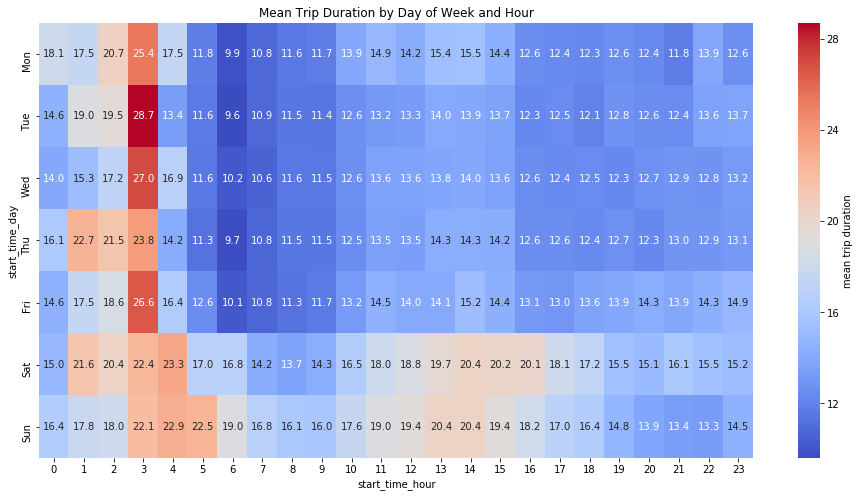

In [55]:
pivot = data.pivot_table(values='duration_min',index='start_time_day',columns='start_time_hour')
plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week and Hour")

#### Observation 3:
> Lastly I wanted to check where bikes are rented most. I used latitude and longitude of start stations for this. It appears that the bikes are mostly rented around San Francisco Financial District (https://goo.gl/maps/TmTE3utq7435rNa9A).

In [56]:
data = df.copy()
data['start_station_latitude'] = data.start_station_latitude.round(3)
data['start_station_longitude'] = data.start_station_longitude.round(3)
data = pd.DataFrame(data.groupby(['start_station_latitude', 'start_station_longitude']).count()['duration_min'])
data = data.reset_index()
data.rename(columns={"start_station_latitude": "latitude", 
                     "start_station_longitude": "longitude", 
                     "duration_min": "number_of_trips"}, inplace=True)
data['longitude'] = data['longitude']+180
data.head()

,latitude,longitude,number_of_trips
0,0.000,180.000,1
1,37.280,58.116,1
2,37.280,58.128,4
3,37.287,58.118,1
4,37.289,58.087,1


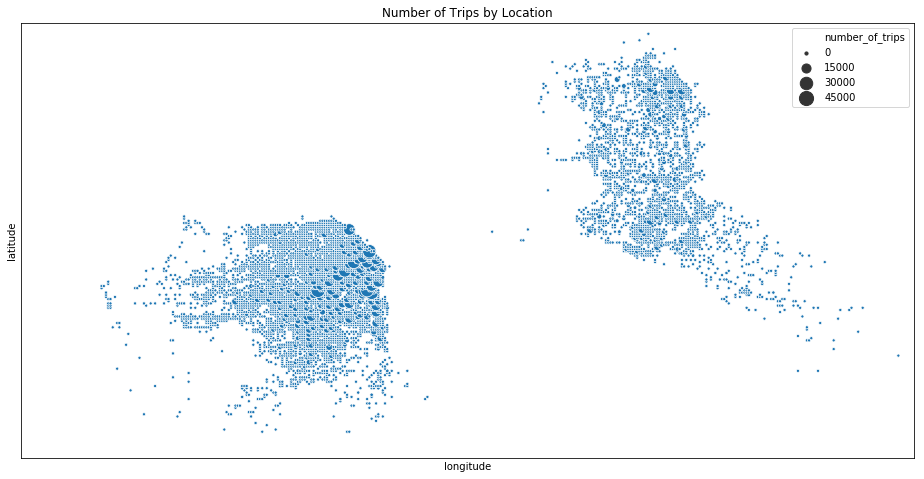

In [63]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="longitude", y="latitude", size="number_of_trips", sizes=(10, 200), data=data)
plt.ylim(37.7,37.9)
plt.xlim(57.45,57.85)
plt.title("Number of Trips by Location")
plt.yticks([])
plt.xticks([])
plt.legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We failed to answer what increased the number of trips at the end of July. We, once again, saw that people do longer trips at weekends.

### Were there any interesting or surprising interactions between features?

> Checking the locations, I didn't know this application was all around San Francisco. I thought it would be aplicable in a small area.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!